#### Methods
We obtained samples from the NCBI GEO unders the accession number GSE75070. The data was for immunoprecipitated (IP) samples and matched input control samples. We assessed the quality of the raw read data with defualt paramters of FastQC v0.12.1 [Andrews, 2010], which allowed us to check sequence quality and GC content. We trimmed adapters and low quality bases with Trimmomatic v0.39 [Bolger et al., 2014] using default parameters. We then aligned the trimmed reads to the human reference genome (GRCh38) using default parameters of bowtie2 v2.5.4 [Langmead & Salzberg, 2012]. After aligning, we performed another quality check with samtools flagstat v1.21 [Heng et al., 2009] at default parameters. We combined all of the quality control metrics using MultiQC v1.25 [Ewels et al., 2016] with the default parameters.

We used the output from the bowtie2 alignment to create HOMER tag directories using HOMER v5.1 [Heinz et al., 2010] and the default parameters. We identified peaks using HOMER and the default parameters before defining reproducible peaks using bedtools intersect v2.31.1 [Quinlan et al., 2010] where intersecting peaks from both replicates required a 50% reciprocal overlap. Then, we converted the reproducible peaks output from a (.pos) file to BED format using HOMER's pos2bed. We removed any peaks from that list that overlapped with the hg38-blacklist using bedtools. We then annotated the final set of reproducible peaks and identified motifs using HOMER.

Also, we sorted and indexed the aligned BAM files using default parameters of samtools v1.21 [Heng et al., 2009]. Then, we produced BigWig files from the sorted and index BAM files using the bamCoverage function in deeptools v3.5.5 [Ramírez et al., 2016] with the default parameters. We generate signal coverage plots using the computeMatrix function in scale-regions mode with 2000bp above and below the TSS and TTS. We obtained the genomic coordinates for hg38 genes from the UCSC genome browser by extracting the human (GRCh38, Dec 2013) UCSC RefSeq (refGene) annotations. Finally, we generated a pearson correlation plot with multiBigWigsummary and plot correlation deeptools functions run with the default parameters.

#### Quality Control Evaluation
The reads for IP_rep1, IP_rep2, and INPUT_rep1 were all equal at around 30 million reads. The sample INPUT_rep2 was sequenced to a lower depth with around 10 million reads. Since this sample was random background data, it was determined that the significantly lower number of reads was still acceptable. According to flagstat, all samples aligned at greater than 80%, which is reasonable and suggests good alignment. After trimming, we observed that a few million reads were removed, which was expected for this experiment. The phred scores look good across all reads, but there was an observed change in GC content. Since this is a binding experiment, we expect a change in GC content since the binding of TFs can change the GC content. The two different sample types (IP vs. INPUT) exhibit two distinct GC content curves, which is expected due to the difference in the sample groups. The sample IP_rep1 has many duplicates, which is expected due to the small length of sequence being observed. The INPUT files would not expect duplicates because they are randomly sampled across the genome. We expected to see high similarity in sequences where the same factor is binding which leads to duplication. There are no significant overrepresented sequences or contamination. Overall, I believe the experiment was of high quality and was suitable for downstream analysis.

#### Signal Coverage Plot
The signal coverage plots represent where the binding signal in IP samples is located in the sample. In both rep1 and rep2, we observe the largest spike in signal before the transcription start site (TSS). This data makes sense and lets us hypothesize that RUNX1 is a transcription factor because it is binding near the TSS region. This is in line with our expectation that RUNX1 is a TF and the signal coverage plots support that conclusion.

**IP Rep1 Signal Coverage**

![IP_rep1.signal_coverage](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/results/IP_rep1.signal_coverage.png)

**IP Rep2 Signal Coverage**

![IP_rep2.signal_coverage](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/results/IP_rep2.signal_coverage.png)

#### Motif Finding
RUNX1, FOXA (FOXA1/FOXA2), FOXM1, and GRHL2 were the top motifs found after the analysis. These results make sense because they are all transcription factors. Similarly, these factors being the resulting motifs suggests that they may be interacting with RUNX1. These factors could also be binding in the same place as RUNX1, which is why they matched the motif search. Finally, these factors were also found to act as chromatin-opening factors, similar to the function of RUNX1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

motifs = pd.read_csv('results/motifs/knownResults.txt', sep="\t")
motifs.head(10)

#### Overlap ChIPseq Results with Original RNAseq Data

In [19]:
rnaseq = pd.read_csv("GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt.gz", sep = "\t")
rnaseq.head()

,genename,transcript,log2FoldChange,padj
0,OARD1,NM_145063,0.186841,0.545806
1,WBSCR22,"NM_001202560,NM_017528,NR_037776,NR_045512",0.037881,0.907305
2,PIGZ,NM_025163,0.122346,0.841445
3,PRDX5,"NM_012094,NM_181651,NM_181652",0.250313,0.118073
4,PEX16,"NM_004813,NM_057174",-0.300675,0.183572


**Upregulated - 687 genes**

In [20]:
rnaseq.query('padj < .01 & log2FoldChange > 1')

,genename,transcript,log2FoldChange,padj
48,SGOL1,"NM_001012409,NM_001012410,NM_001012411,NM_0010...",1.865109,7.048718e-16
50,MYCN,"NM_001293228,NM_001293231,NM_001293233",1.961676,9.265427e-05
66,INCENP,"NM_001040694,NM_020238",1.635607,3.296986e-14
80,VCAN,"NM_001126336,NM_001164097,NM_001164098,NM_004385",2.010163,1.561000e-06
86,TPI1,"NM_001159287,NM_001258026",1.052948,9.799512e-11
...,...,...,...,...
15256,PCDHAC2,"NM_018899,NM_031883",1.590426,1.305452e-07
15274,TCF19,"NM_001077511,NM_007109",1.684759,1.205806e-18
15282,NEK2,"NM_001204182,NM_001204183,NM_002497",1.349700,1.898691e-05
15335,SMAD9,"NM_001127217,NM_005905",1.333194,8.277110e-03


**Downregulated - 466 genes**

In [21]:
rnaseq.query('padj < .01 & log2FoldChange < -1')

,genename,transcript,log2FoldChange,padj
39,CYSRT1,NM_199001,-1.179227,6.910866e-04
139,AGAP9,"NM_001190810,NM_001190810_chr10:47191843_47213626",-1.179856,2.622705e-04
146,TM2D1,NM_032027,-1.120710,2.415048e-07
162,SEMA4C,NM_017789,-1.480403,4.369624e-13
206,CCDC78,NM_001031737,-1.080449,1.883375e-03
...,...,...,...,...
15330,UCKL1-AS1,NR_027287,-1.222779,2.415494e-04
15343,SCARNA12,NR_003010,-1.013360,2.225647e-08
15367,TM4SF1,NM_014220,-2.659629,1.184314e-13
15381,PAN2,"NM_001127460,NM_001166279,NM_014871",-1.394833,1.368096e-28


**FIGURE 2D**

![MALAT1_Figure2D](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/MALAT1.png)

**FIGURE 2E**

![NEAT1_Figure2E](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/NEAT1.png)

From the annotated peaks, we do observe statistically significant peaks in MALAT1 and NEAT1. The genomic tracks are relatively similar to those in the paper. The gene MALAT1 has two distinct peaks on the left hand side, which is reflected in the paper. Similarly, in the gene NEAT1, we observe a higher concetration of peaks on the left hand side of the gene, which is also seen in the paper. There are slight differences, and these discrenpenies could be attributed to differences in reference genomes, alignment parameters, or annotation versions.

**Consensus Set of Peaks**

When generating a set of reproducible peaks with bedtools intersect, I chose a 50% reciprocal overlap threshold. This value allows for the results to be neither stringent or too permissive. This threshold requires that at least half of each peak region overlaps between the two replicates, ensuring that peaks are significantly similar in both location and size while accounting for biological variability inherent in many experiments.

**FIGURE 2F**

/scratch/1938915.1.academic/ipykernel_2079662/1371972809.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)


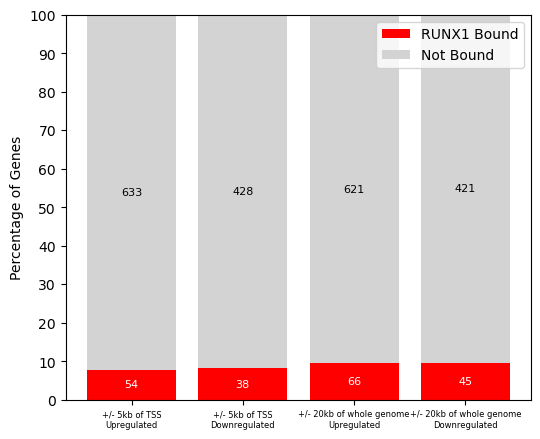

In [22]:
peaks = pd.read_csv("/projectnb/bf528/students/lander18/project-3-laurenanderson0818/results/annotated_peaks.txt", sep="\t")

de_genes = rnaseq.query('padj < .01 & abs(log2FoldChange) > 1')['genename'].tolist()
pos_genes = rnaseq.query('padj < .01 & log2FoldChange > 1')['genename'].tolist()
neg_genes = rnaseq.query('padj < .01 & log2FoldChange < -1')['genename'].tolist()

peaks['DE_status'] = 'Not DE'
peaks.loc[peaks['Gene Name'].isin(pos_genes), 'DE_status'] = 'Upregulated'
peaks.loc[peaks['Gene Name'].isin(neg_genes), 'DE_status'] = 'Downregulated'

promoter_peaks = peaks[peaks['Distance to TSS'].abs() <= 5000]
genebody_peaks = peaks[peaks['Distance to TSS'].abs() <= 20000]

def calc_bound_unbound(peaks_df, de_list, de_status):
    total_genes = len(de_list)
    bound_genes = peaks_df[peaks_df['DE_status'] == de_status]['Gene Name'].nunique()
    unbound_genes = total_genes - bound_genes
    bound_pct = (bound_genes / total_genes) * 100 if total_genes > 0 else 0
    unbound_pct = (unbound_genes / total_genes) * 100 if total_genes > 0 else 0
    return bound_pct, unbound_pct, bound_genes, unbound_genes

categories = [
    ('+/- 5kb of TSS', 'Upregulated', promoter_peaks, pos_genes),
    ('+/- 5kb of TSS', 'Downregulated', promoter_peaks, neg_genes),
    ('+/- 20kb of whole genome', 'Upregulated', genebody_peaks, pos_genes),
    ('+/- 20kb of whole genome', 'Downregulated', genebody_peaks, neg_genes)
]

plot_data = []
for label, status, df, gene_list in categories:
    bound_pct, unbound_pct, bound_count, unbound_count = calc_bound_unbound(df, gene_list, status)
    plot_data.append({
        'Category': f'{label}\n{status}',
        'Bound %': bound_pct,
        'Unbound %': unbound_pct,
        'Bound count': bound_count,
        'Unbound count': unbound_count
    })

plot_df = pd.DataFrame(plot_data)

fig, ax = plt.subplots(figsize=(6,5))

bars = ax.bar(plot_df['Category'], plot_df['Bound %'], color='red', label='RUNX1 Bound')
bars2 = ax.bar(plot_df['Category'], plot_df['Unbound %'], bottom=plot_df['Bound %'], color='lightgray', label='Not Bound')

for i, row in plot_df.iterrows():
    ax.text(i, row['Bound %']/2, str(row['Bound count']), ha='center', va='center', fontsize=8, color='white')
    ax.text(i, row['Bound %'] + row['Unbound %']/2, str(row['Unbound count']), ha='center', va='center', fontsize=8)

ax.set_ylabel('Percentage of Genes')
ax.set_ylim(0, 100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
ax.set_title('')

ax.set_yticks(range(0, 101, 10))
ax.yaxis.grid(False)

ax.legend(loc='upper right')

plt.show()

Do you observe any differences in the number of overlapping genes from both analyses? 
Yes, I observe differences in the number of overlapping genes from both analyses. However, the general trends are the same in that all categories have less than 30% overlap and there is generally more overlap +/- 20kb of the whole genome than +/- 5kb of TSS. These differences may have been caused by the different genomic windows that we are observing. For example, since the whole genome is much broader than the TSS region, it may include additional overlaps not present in the TSS region leading to the greater number of overlaps and differing number of overlaps. Second, there may be differences in the annotation version that led to different labelling of each peak and ultimately changing whether an overlap was observed/noted or not.

We combine these two analyses because it allows us to tell the difference between direct promoter-level RUNX1 regulation (+/- 5kb) from more distal or indirect RUNX1 influences (+/- 20kb). The +/- 5kb analysis tests if RUNX1 binds near the TSS where it directly regulates transcription initiation while the +/- 20kb genome analysis captures broader regulatory relationships. The two analyses give a complete picture of how RUNX1 binding contributes to differential gene expression. One conclusion this allows us to draw is whether RUNX1 directly regulates transcription through the promoter. If a larger percentage of differentially expressed genes have +/- 5kb RUNX1 peaks, it suggests direct transcriptional regulation. However, given that we have similar number of overlapping peaks, it can be assumed that transcriptional regulation occurs throughout the genome.

#### Comparing Key Findings to the Original Paper

In [23]:
de_peaks = peaks.query('`Gene Name` in @de_genes')

**SUPPLEMENTARY FIGURE S2A**

In [24]:
data = {
    "Sample Name": ["RUNX1 ChIP", "RUNX1 ChIP", "Input", "Input"],
    "Biological Replicate": [1, 2, 1, 2],
    "Raw Reads": ['29,100,000', '29,000,000','30,000,000', '10,900,000'],
    "Mapped Reads": ['28,000,000', '28,400,000','28,700,000', '10,100,000'],
}

df = pd.DataFrame(data)
df

,Sample Name,Biological Replicate,Raw Reads,Mapped Reads
0,RUNX1 ChIP,1,"29,100,000","28,000,000"
1,RUNX1 ChIP,2,"29,000,000","28,400,000"
2,Input,1,"30,000,000","28,700,000"
3,Input,2,"10,900,000","10,100,000"


I observe slight differences in the reported number of raw and mapped reads. The paper contained a relatively lower number of mapped reads for their data than I observed in my data. These discrenpencies could be attributed to differences in read processing and filtering steps, leading to a varying number of reads. Also, these difference could be caused by difference in the alignment parameters, causing different and perhaps more stringent mapping to occur.

**SUPPLEMENTARY FIGURE S2B**

![correlation_plot](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/results/correlation_plot.png)

I do not observe any differences in my calculated metrics for the correlation plot. Both plots indicate that the INPUT and IP groups are significantly different from one another. The author's used this figure to demonstrate that the ChIP-IP samples form a distinct group separate from the INPUT controls, indicating successful enrichment of RUNX1-bound chromatin. My conclusion from this figure is that the experiment was successful due to the clear separation between INPUT and IP samples in the correlation plot.


**Correlation Method**

I used the Pearson correlation in my analysis. I used this method because the authors also used a Pearson correlation and I believed it would be more beneficial when re-creating results. While a Spearman correlation is more robust when assuming data is not normal, like in this experiment, the Pearson correlation measures the linear relationship between two continuous variables, which is appropriate when examining the relationship between gene expression levels.

**SUPPLEMENTARY FIGURE S2C**

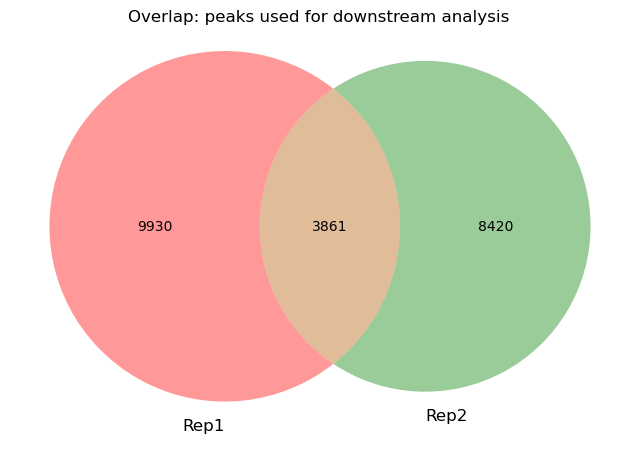

In [25]:
def load_homer_peaks(path):
    peaks = {}
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue
            parts = line.strip().split()
            if len(parts) < 3:
                continue
            chrom = parts[0]
            start = int(parts[1])
            end   = int(parts[2])
            peaks.setdefault(chrom, []).append((start, end))
    return peaks

rep1 = load_homer_peaks("results/rep1.bed")
rep2 = load_homer_peaks("results/rep2.bed")

def count_overlaps(repA, repB):
    overlap = 0
    A_only = 0
    B_only = 0

    all_chroms = set(repA.keys()) | set(repB.keys())

    for chrom in all_chroms:
        A_peaks = repA.get(chrom, [])
        B_peaks = repB.get(chrom, [])

        B_hit = [False] * len(B_peaks)

        for a_start, a_end in A_peaks:
            has_overlap = False
            for i, (b_start, b_end) in enumerate(B_peaks):
                if not (a_end < b_start or b_end < a_start):
                    overlap += 1
                    has_overlap = True
                    B_hit[i] = True
                    break
            if not has_overlap:
                A_only += 1

        B_only += sum(1 for hit in B_hit if not hit)

    return A_only, B_only, overlap


rep1_only, rep2_only, overlap = count_overlaps(rep1, rep2)

plt.figure(figsize=(8,6))

v = venn2(
    subsets=(rep1_only, rep2_only, overlap),
    set_labels=("Rep1", "Rep2")
)

plt.text(
    0, 0.55,
    "Overlap: peaks used for downstream analysis",
    ha='center',
    va='top',
    fontsize=12
)

plt.show()

Yes, I observe differences in my results compared to what is found in the paper. In general,the number of overlapping peaks is relatively the same, but the number of genes in rep1 and rep2 vary greatly from those in the paper. There may have been differences in the peak calling software or parameters that led to the differing values in the venn diagram. Another explanation for these discrenpencies is that the read alignment and annotation varied between the samples, changing what may be considered an overlap or what certain peaks may be classified as.

#### Analyze the Annotated Peaks

In [26]:
de_promoters = de_peaks[de_peaks['Annotation'].str.contains('promoter-TSS')]['Gene Name'].tolist()

with open('results/de_promoters.txt', 'w') as w:
    w.write('\n'.join(de_promoters))

![ENRICHR_results](/projectnb/bf528/students/lander18/project-3-laurenanderson0818/ENRICHR.png)

I performed an Enrichr enrichment of the peaks found within the promoter region by subsetting the peaks data to include only peaks found in the promoter and entering these genes into the Enrichr interface. Overall, DNA replication and cell cycle pathways appeared as top hits across multiple databases from Enrichr, indicating their importance in IP samples (DNA Strand Elongation, S phase, DNA replication, and Cell Cycle). Cholesterol biosynthesis and metabolic pathways also show strong enrichment, indicating that RUNX1 may play dual roles in both metabolic regulation and cell proliferation. Overall, the enrichment  suggests the analyzed peaks correspond to binding sites of a TF, or chromatin modification involved in cell cycle progression. These are some expected results given the the cancer context of this study.

**Citations**

Aaron R. Quinlan, Ira M. Hall, BEDTools: a flexible suite of utilities for comparing genomic features, Bioinformatics, Volume 26, Issue 6, March 2010, Pages 841–842, https://doi.org/10.1093/bioinformatics/btq033

Andrews S. (2010). FastQC: a quality control tool for high throughput
sequence data. Available online at: <a href="http://www.bioinformatics.babraham.ac.uk/projects/fastqc" class="uri">http://www.bioinformatics.babraham.ac.uk/projects/fastqc

Anthony M. Bolger, Marc Lohse, Bjoern Usadel, Trimmomatic: a flexible trimmer for Illumina sequence data, Bioinformatics, Volume 30, Issue 15, August 2014, Pages 2114–2120, https://doi.org/10.1093/bioinformatics/btu170

Heng Li, Bob Handsaker, Alec Wysoker, Tim Fennell, Jue Ruan, Nils Homer, Gabor Marth, Goncalo Abecasis, Richard Durbin, 1000 Genome Project Data Processing Subgroup, The Sequence Alignment/Map format and SAMtools, Bioinformatics, Volume 25, Issue 16, August 2009, Pages 2078–2079, https://doi.org/10.1093/bioinformatics/btp352

Heinz S, Benner C, Spann N, Bertolino E et al. Simple Combinations of Lineage-Determining Transcription Factors Prime cis-Regulatory Elements Required for Macrophage and B Cell Identities. Mol Cell 2010 May 28;38(4):576-589. PMID: 20513432

Langmead B, Salzberg SL. Fast gapped-read alignment with Bowtie 2. Nat Methods. 2012 Mar 4;9(4):357-9. doi: 10.1038/nmeth.1923. PMID: 22388286; PMCID: PMC3322381.

Philip Ewels, Måns Magnusson, Sverker Lundin, Max Käller, MultiQC: summarize analysis results for multiple tools and samples in a single report, Bioinformatics, Volume 32, Issue 19, October 2016, Pages 3047–3048, https://doi.org/10.1093/bioinformatics/btw354

Ramírez, Fidel, Devon P. Ryan, Björn Grüning, Vivek Bhardwaj, Fabian Kilpert, Andreas S. Richter, Steffen Heyne, Friederike Dündar, and Thomas Manke. deepTools2: A next Generation Web Server for Deep-Sequencing Data Analysis. Nucleic Acids Research (2016). doi:10.1093/nar/gkw257.